<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Android_sia_app_n_sia_calc_magnitude_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/app and calc SIA magnitude dr aishwarya Raj.xlsx')


In [2]:
df.shape

(107, 2)

In [3]:
df.columns

Index(['app_magnitude', 'calc_magnitude'], dtype='object')

In [4]:
df.describe()

,app_magnitude,calc_magnitude
count,107.000000,107.000000
mean,1.314382,1.490467
std,1.638689,1.096741
min,0.000000,0.170000
25%,0.353500,0.785000
50%,0.870000,1.260000
75%,1.580000,1.865000
max,9.000000,6.530000


In [5]:
df.corr()

,app_magnitude,calc_magnitude
app_magnitude,1.00000,0.37748
calc_magnitude,0.37748,1.00000


array([[<Axes: title={'center': 'app_magnitude'}>,
        <Axes: title={'center': 'calc_magnitude'}>]], dtype=object)

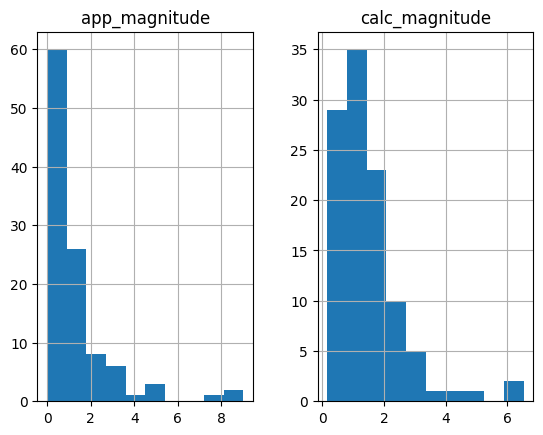

In [6]:
df.hist()

<Axes: >

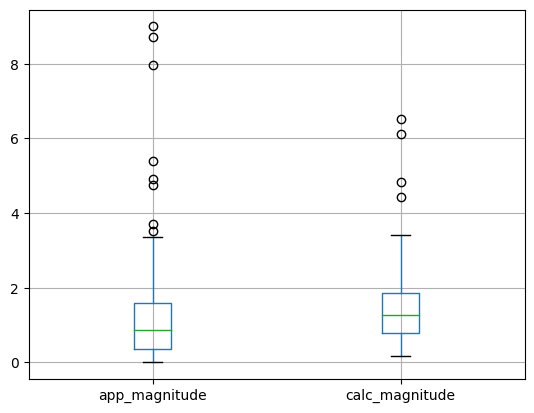

In [7]:
df.boxplot()

<Axes: >

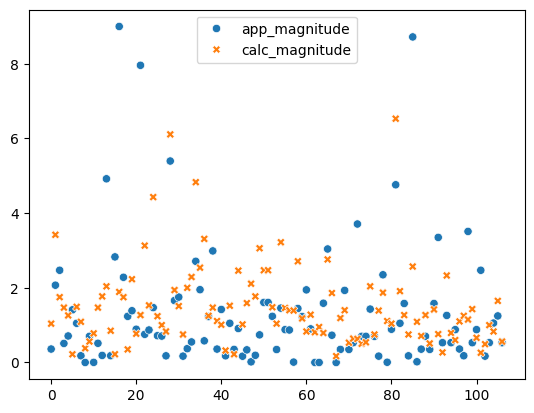

In [9]:
import seaborn as sns
sns.scatterplot(df)

In [13]:
q1 = df.app_magnitude.quantile(0.25)
q3 = df.app_magnitude.quantile(0.75)
q1,q3

(0.3535, 1.58)

In [14]:
iqr = q3-q1
iqr

1.2265000000000001

In [17]:
lowerlimit = q1-1.5*iqr
upperlimit = q3+1.5*iqr
lowerlimit, upperlimit

(-1.4862500000000003, 3.4197500000000005)

In [19]:
df1 = df[(df.app_magnitude>lowerlimit) & (df.app_magnitude<upperlimit)]

In [21]:
df1.shape

(99, 2)

<Axes: >

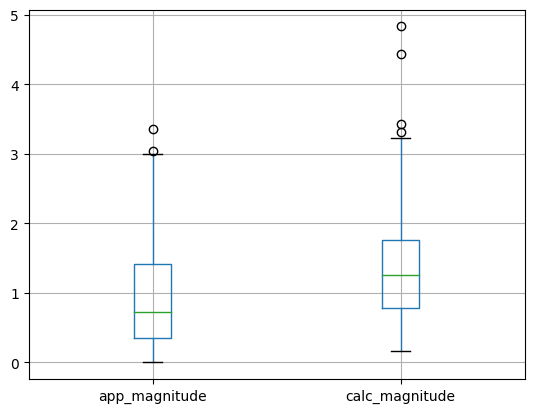

In [22]:
df1.boxplot()

In [33]:
q1c = df1.calc_magnitude.quantile(0.25)
q3c = df1.calc_magnitude.quantile(0.75)

In [35]:
iqrc = q3c-q1c
iqrc

0.985

In [36]:
lowerlimitc = q1c-1.5*iqrc
upperlimitc = q3c+1.5*iqrc

In [44]:

df2 = df1[(df1.calc_magnitude>lowerlimitc) & (df1.calc_magnitude<upperlimitc)]




In [39]:
df2.shape

(95, 2)

<Axes: >

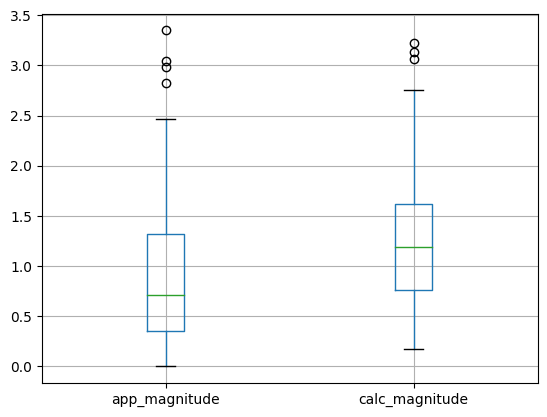

In [40]:
df2.boxplot()

In [45]:

q1m = df2.app_magnitude.quantile(0.25)
q3m = df2.app_magnitude.quantile(0.75)

In [46]:
iqrm = q3m-q1m
iqrm

0.9735

In [48]:
lowerlimitm = q1m-1.5*iqrm
upperlimitm = q3m+1.5*iqrm

In [49]:
df3 = df2[(df2.app_magnitude>lowerlimitm) & (df2.app_magnitude<upperlimitm)]

<Axes: >

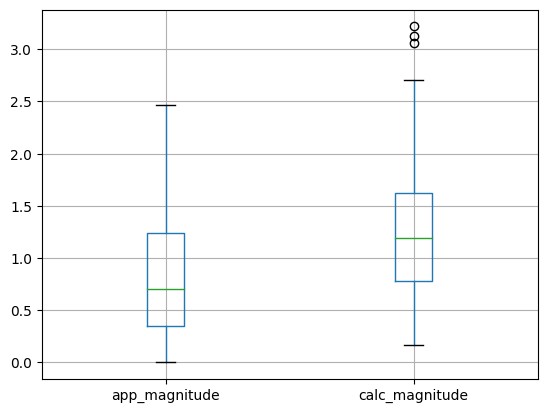

In [50]:
df3.boxplot()

In [51]:
df3.shape

(91, 2)

In [52]:
q1c1 = df3.calc_magnitude.quantile(0.25)
q3c1 = df3.calc_magnitude.quantile(0.75)

In [53]:
iqrc1 = q3c1-q1c1
iqrc1

0.8450000000000001

In [54]:
lowerlimitc1 = q1c1-1.5*iqrc1
upperlimitc1 = q3c1+1.5*iqrc1

In [56]:
df4 = df3[(df3.calc_magnitude>lowerlimitc1) & (df3.calc_magnitude<upperlimitc1)]

In [57]:
df4.shape

(88, 2)

<Axes: >

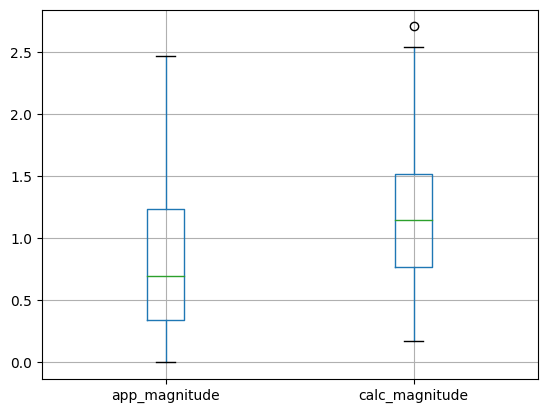

In [58]:
df4.boxplot()